<a href="https://colab.research.google.com/github/Nitesh-sahu/CNN/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-df238013-c7ab-a919-7252-9091a4144dcb)


In [4]:
from keras.layers import Input, Lambda, Dense ,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19 as vg
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [5]:
IMAGE_SIZE=[224,224]

train_path='/content/drive/My Drive/datasets/Crop-animal/trainset'
valid_path='/content/drive/My Drive/datasets/Crop-animal/testset'


In [6]:
vgg=vg(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [7]:
for layer in vgg.layers:
    layer.trainable=False
    

In [8]:
folder=glob('/content/drive/My Drive/datasets/Crop-animal/trainset/*')


In [9]:
len(folder)

7

In [10]:
x=Flatten()(vgg.output)

In [11]:
prediction=Dense(len(folder),activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)


In [12]:
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True
                                )
test_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/datasets/Crop-animal/trainset',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1593 images belonging to 7 classes.


In [16]:

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/datasets/Crop-animal/testset',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 702 images belonging to 7 classes.


In [17]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
50/50 [==============================] - 40s 808ms/step - loss: 1.5236 - accuracy: 0.5587 - val_loss: 0.3483 - val_accuracy: 0.8946
Epoch 2/5
50/50 [==============================] - 35s 701ms/step - loss: 0.4449 - accuracy: 0.8588 - val_loss: 0.2166 - val_accuracy: 0.9459
Epoch 3/5
50/50 [==============================] - 35s 700ms/step - loss: 0.3008 - accuracy: 0.9140 - val_loss: 0.2815 - val_accuracy: 0.9117
Epoch 4/5
50/50 [==============================] - 35s 702ms/step - loss: 0.1933 - accuracy: 0.9454 - val_loss: 0.1127 - val_accuracy: 0.9744
Epoch 5/5
50/50 [==============================] - 35s 699ms/step - loss: 0.1726 - accuracy: 0.9548 - val_loss: 0.0967 - val_accuracy: 0.9929


In [18]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

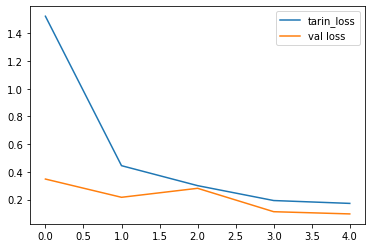

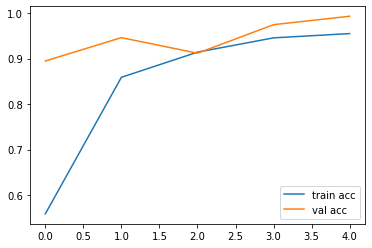

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'],label='tarin_loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[1.2253360e-02, 3.6576577e-02, 5.7090027e-03, ..., 1.2120587e-02,
        9.1537601e-01, 7.2554313e-03],
       [3.0323395e-06, 9.9977082e-01, 2.2046502e-04, ..., 9.9791535e-08,
        4.7356698e-07, 1.7155755e-06],
       [9.6417081e-01, 3.0489778e-03, 1.2730926e-03, ..., 2.7208695e-02,
        1.3298572e-03, 6.0374540e-04],
       ...,
       [1.3731198e-05, 9.9974424e-01, 1.0134097e-04, ..., 3.7636291e-06,
        4.6833270e-06, 4.6702326e-06],
       [5.7332905e-04, 5.7440389e-05, 3.4971243e-05, ..., 9.9473912e-01,
        4.5154695e-03, 7.5274693e-05],
       [6.5709297e-05, 1.1364929e-03, 1.3787124e-03, ..., 9.9511188e-01,
        2.2373816e-03, 6.6062486e-05]], dtype=float32)